In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [52]:
import seaborn as sns

In [22]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [23]:
df.dropna(inplace=True)

In [24]:
df.shape

(714, 3)

In [25]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [26]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [27]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [29]:

clf = DecisionTreeClassifier()

In [30]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [31]:

accuracy_score(y_test,y_pred)

0.6293706293706294

In [32]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.6260954616588419)

In [33]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [34]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [35]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [36]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [37]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [38]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())



In [39]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
315,26.00,6.0,7.8542,2.0,"(25.0, 28.0]","(7.775, 7.896]"
636,32.00,9.0,7.9250,3.0,"(30.0, 32.0]","(7.896, 8.158]"
435,14.00,1.0,120.0000,14.0,"(6.0, 16.0]","(108.9, 512.329]"
803,0.42,0.0,8.5167,4.0,NaN,"(8.158, 10.5]"
209,40.00,11.0,31.0000,10.0,"(38.0, 42.0]","(26.55, 31.275]"


In [40]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [41]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [42]:
X_trf = trf.fit_transform(X)
float(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))

np.float64(0.6288732394366197)

In [66]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X['Age'],kde=True,edgecolor=(1,1,1,.4))
    plt.title("Before")

    plt.subplot(122)
    sns.histplot(X_trf[:,0],kde=True,color=(1,.6,.6),edgecolor=(1,1,1,.4))
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X['Fare'],kde=True,edgecolor=(1,1,1,.4))
    plt.title("Before")

    plt.subplot(122)
    sns.histplot(X_trf[:,1],kde=True,color=(1,.6,.6),edgecolor=(1,1,1,.4))
    plt.title("Fare")

    plt.show()
    

0.6288928012519561


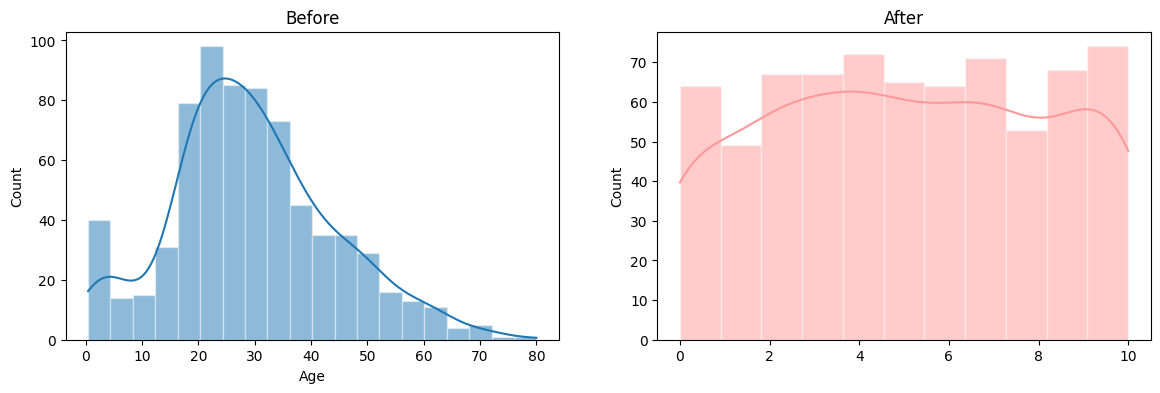

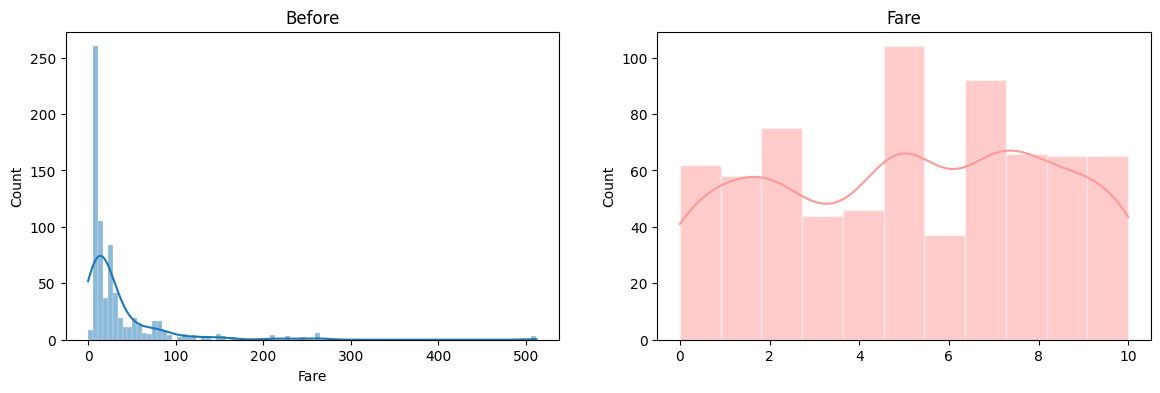

In [67]:
discretize(11,'quantile')